In [1]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [27]:
df=pd.read_csv('Resources/water_potability.csv')
df.tail()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.80216,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.57822,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.86938,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1
3275,7.874671,195.102299,17404.17706,7.509306,NaN,327.459761,16.140368,78.698446,2.309149,1


In [9]:
new_df=df.bfill().ffill()

In [10]:
new_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,3.716080,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,368.516441,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,368.516441,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [11]:
 #assigns the data to X and y
def input_output(df):
    
    X =new_df.drop(["Potability"],axis=1)
    y=new_df["Potability"].values.ravel()
    return X, y

In [12]:
X,y=input_output(new_df)

In [13]:
X

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,3.716080,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.05786,6.635246,368.516441,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.54173,9.275884,368.516441,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681736,47580.99160,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.80216,8.061362,359.948574,392.449580,19.903225,66.687695,2.798243
3273,9.419510,175.762646,33155.57822,7.350233,359.948574,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.86938,6.303357,359.948574,402.883113,11.168946,77.488213,4.708658


In [45]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,random_state=42,shuffle=True)

In [46]:
print(y_train)

[0 0 0 ... 0 0 1]


In [47]:
scaler=StandardScaler()
scaler.fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [16]:
# Create a random forest classifier
rfc = RandomForestClassifier(random_state=42)

In [17]:
max_depth = [int(x) for x in np.linspace(1,201,10)]
max_depth.append(None)
param_grid={'bootstrap':[False],
            'max_depth':max_depth,
            'max_features':['auto','log2'],
            'n_estimators': [int(x) for x in np.linspace(1, 201, 10)] }



water_grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,n_jobs=1,verbose=0,return_train_score=True)


In [34]:
water_model=water_grid.fit(X_train_scaled,y_train)

In [35]:
water_model.score(X_test_scaled,y_test)

0.698170731707317

In [36]:
water_dict=water_model.best_params_

In [37]:
water_dict

{'bootstrap': False,
 'max_depth': 23,
 'max_features': 'auto',
 'n_estimators': 156}

In [38]:
water_model.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train_scaled,y_train)

LogisticRegression()

In [42]:
classifier.score(X_test_scaled,y_test)

0.6280487804878049

In [48]:
from tensorflow.keras.utils import to_categorical
# first, create a normal neural network with 9 inputs, 9 hidden nodes, and 2 outputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [73]:
# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

In [64]:
y_train_categorical

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [74]:
model = Sequential()
model.add(Dense(units=9, activation='relu', input_dim=9))
model.add(Dense(units=2, activation='softmax'))

In [75]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 9)                 90        
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 20        
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________


In [76]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [77]:
# Fit the model to the training data
model.fit(
    X_train_scaled,
    y_train_categorical,
    epochs=100,
    shuffle=True,
    verbose=2)

Epoch 1/100
82/82 - 0s - loss: 0.7805 - accuracy: 0.4969
Epoch 2/100
82/82 - 0s - loss: 0.7081 - accuracy: 0.5573
Epoch 3/100
82/82 - 0s - loss: 0.6836 - accuracy: 0.5828
Epoch 4/100
82/82 - 0s - loss: 0.6689 - accuracy: 0.5969
Epoch 5/100
82/82 - 0s - loss: 0.6588 - accuracy: 0.6088
Epoch 6/100
82/82 - 0s - loss: 0.6512 - accuracy: 0.6275
Epoch 7/100
82/82 - 0s - loss: 0.6452 - accuracy: 0.6328
Epoch 8/100
82/82 - 0s - loss: 0.6403 - accuracy: 0.6416
Epoch 9/100
82/82 - 0s - loss: 0.6363 - accuracy: 0.6469
Epoch 10/100
82/82 - 0s - loss: 0.6327 - accuracy: 0.6489
Epoch 11/100
82/82 - 0s - loss: 0.6295 - accuracy: 0.6515
Epoch 12/100
82/82 - 0s - loss: 0.6266 - accuracy: 0.6519
Epoch 13/100
82/82 - 0s - loss: 0.6236 - accuracy: 0.6527
Epoch 14/100
82/82 - 0s - loss: 0.6212 - accuracy: 0.6592
Epoch 15/100
82/82 - 0s - loss: 0.6187 - accuracy: 0.6576
Epoch 16/100
82/82 - 0s - loss: 0.6167 - accuracy: 0.6679
Epoch 17/100
82/82 - 0s - loss: 0.6149 - accuracy: 0.6687
Epoch 18/100
82/82 - 0s

In [78]:
from sklearn import tree

In [79]:
# Create and score a decision tree classifier
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train_scaled, y_train)
clf.score(X_test, y_test)

0.6280487804878049

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [81]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")

k: 1, Train/Test Score: 1.000/0.645
k: 3, Train/Test Score: 0.808/0.625
k: 5, Train/Test Score: 0.765/0.643
k: 7, Train/Test Score: 0.743/0.627
k: 9, Train/Test Score: 0.723/0.648
k: 11, Train/Test Score: 0.710/0.655
k: 13, Train/Test Score: 0.711/0.651
k: 15, Train/Test Score: 0.701/0.654
k: 17, Train/Test Score: 0.698/0.652
k: 19, Train/Test Score: 0.690/0.675


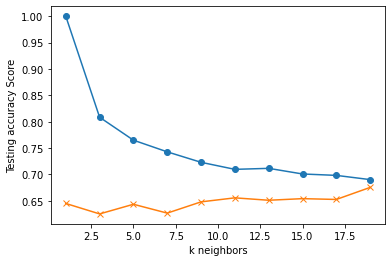

In [82]:
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [83]:
# Note that k: 9 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_scaled, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=9 Test Acc: 0.648


In [84]:

predicted_class = knn.predict(X_test)
print(predicted_class)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

In [85]:
print(y_test)

[0 1 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 0 1 0 0
 0 1 1 1 0 0 1 1 0 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0
 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1
 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1
 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0
 1 0 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 0 0
 1 1 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 1 1 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 